In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA
import math

# We start loading all the audio variables

In [2]:
#read echonest.csv
echonest=pd.read_csv("/Users/simone/Desktop/echonest.csv")


In [3]:
echonest.dtypes

track_id                                int64
audio_features_acousticness           float64
audio_features_danceability           float64
audio_features_energy                 float64
audio_features_instrumentalness       float64
audio_features_liveness               float64
audio_features_speechiness            float64
audio_features_tempo                  float64
audio_features_valence                float64
metadata_album_date                    object
metadata_album_name                    object
metadata_artist_latitude              float64
metadata_artist_location               object
metadata_artist_longitude             float64
metadata_artist_name                   object
metadata_release                       object
ranks_artist_discovery_rank           float64
ranks_artist_familiarity_rank         float64
ranks_artist_hotttnesss_rank          float64
ranks_song_currency_rank              float64
ranks_song_hotttnesss_rank            float64
social_features_artist_discovery  

In [4]:
echonest.isnull().sum()

track_id                                  0
audio_features_acousticness               0
audio_features_danceability               0
audio_features_energy                     0
audio_features_instrumentalness           0
audio_features_liveness                   0
audio_features_speechiness                0
audio_features_tempo                      0
audio_features_valence                    0
metadata_album_date                   10412
metadata_album_name                   10257
metadata_artist_latitude               3359
metadata_artist_location               3359
metadata_artist_longitude              3359
metadata_artist_name                      0
metadata_release                          0
ranks_artist_discovery_rank           10304
ranks_artist_familiarity_rank         10304
ranks_artist_hotttnesss_rank          10305
ranks_song_currency_rank              11096
ranks_song_hotttnesss_rank            10923
social_features_artist_discovery          0
social_features_artist_familiari

there are many na values

In [5]:
echonest.tail()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,metadata_album_name,metadata_artist_latitude,metadata_artist_location,metadata_artist_longitude,metadata_artist_name,metadata_release,ranks_artist_discovery_rank,ranks_artist_familiarity_rank,ranks_artist_hotttnesss_rank,ranks_song_currency_rank,ranks_song_hotttnesss_rank,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,tempor

# a little description:
- track_id: the id of the track
- audio_features_acousticness: a value in [0-1], when the track is closer to 0 it has mainly an electric sound
- audio_features_danceability: a value in [0-1], it's expressing a combination of tempo,rythm, beat strengt, so how suitable is for dancing
- audio_features_energy: a value in [0-1], when the track is closer to 1, the song has fast,loud,noisy sounds
- audio_features_instrumentalness: a value in [0-1], when the track is closer to 1, the song has the high probability that there is no vocals
- audio_features_liveness: a value in [0-1], it describes how likely the song was performed live
- audio_features_speechiness: a value in [0-1], it describes how it is exclusively speech-like the recording
- audio_features_tempo: it describes the number of beats per minute
- audio_features_valence:a value in [0-1], it describes how much the song is positive
- metadata_album_date:
- metadata_album_name
- metadata_artist_latitude
- metadata_artist_location
- metadata_artist_longitude
- metadata_artist_name
- metadata_release
- ranks_artist_discovery_rank
- ranks_artist_familiarity_rank: a value in [0-1], it is an indication of how well known the artist is 
- ranks_artist_hotttnesss_rank: a value in [0-1], it gives an indication how much popular the artist is  now
- ranks_song_currency_rank
- ranks_song_hotttnesss_rank: a value in [0-1], it gives an indication how much popular the song is now
- social_features_artist_discovery
- social_features_artist_familiarity
- social_features_artist_hotttnesss
- social_features_song_currency
- social_features_song_hotttnesss
- temporal_features_000 to temporal_features_223 

Now, we are going to drop the columns that are not needed.

In [6]:
#i make a copy of our dataframa
e=echonest.copy()
not_dropped_columns=["audio_features_acousticness","audio_features_danceability","audio_features_energy","audio_features_instrumentalness","audio_features_liveness","audio_features_speechiness","audio_features_tempo","audio_features_valence"]
e=e[not_dropped_columns]


the next step is counting the na values after the dropping

In [7]:
e.isnull().sum()

audio_features_acousticness        0
audio_features_danceability        0
audio_features_energy              0
audio_features_instrumentalness    0
audio_features_liveness            0
audio_features_speechiness         0
audio_features_tempo               0
audio_features_valence             0
dtype: int64

We use PCA to make the dataset smaller and to remove the redundancy

this choice was taken for all the datasets.
the reasons are many:
- this removes the correlated features
- it improves the algorithm performance
- it gives the possibility to choose the quantity of information to keep

However it has some disavantages:
- indenpendent variables become hard to find
- there is a limited information loss

First step is Standardization, to make that each variable  contributes equally to the analysis.
$$
  z=\frac {value - mean } {standardDeviation}\
$$

In [8]:
normalised_columns=["audio_features_acousticness","audio_features_danceability","audio_features_energy","audio_features_instrumentalness","audio_features_liveness","audio_features_speechiness","audio_features_tempo","audio_features_valence"]
for col in normalised_columns:
    mean=e[col].mean()
    std=e[col].std()
    e[col]=(e[col]- mean)/std
e.tail()

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence
13124,-1.347590,1.593882,0.653745,0.588157,3.371778,-0.121012,0.521259,1.632803
13125,-1.259230,1.871104,-0.003667,0.621462,2.278674,-0.183240,-0.602741,0.134351
13126,-1.367052,0.643687,1.286177,0.570201,2.816183,-0.346898,0.197513,0.206162
13127,-0.513687,0.458252,0.038883,-0.519239,-0.707848,-0.478858,0.540593,0.469204
13128,1.222038,0.063364,-1.751107,0.844259,-0.581069,-0.247380,-0.088963,-0.851755


In [9]:
e.shape

(13129, 8)

I compute the PCA on this dataset, creating principals to get a total variance that is more than 70 %

In [10]:
pca = PCA(n_components = 0.70)
X_new = pca.fit_transform(e)
x=pca.transform(e)


In [11]:
x.shape

(13129, 5)

here we create a new dataframe and insert again the track_id

In [12]:
e=pd.DataFrame(x)
e= e.add_suffix("_e")
e["track_id"]=echonest["track_id"]
e.tail()

,0_e,1_e,2_e,3_e,4_e,track_id
13124,2.191704,-0.318925,1.393943,-0.202148,3.170866,124857
13125,1.030108,0.204303,0.380319,-1.237604,2.154335,124862
13126,1.313609,-1.285334,1.433216,-0.927871,2.191933,124863
13127,0.874314,-0.093119,-0.605274,0.155213,-0.460692,124864
13128,-2.014566,0.716116,-0.897026,0.713075,-0.183085,124911


# Now we load the features.csv file

In [13]:
#read features.csv
features=pd.read_csv("/Users/simone/Library/Containers/com.wdc.WDDesktop.WDDesktopFinderSync/Data/volumes/307d2687-c70f-4df6-bef9-e2c3a3f5df4e/Simone's My Cloud Home/features.csv")

FileNotFoundError: [Errno 2] No such file or directory: "/Users/simone/Library/Containers/com.wdc.WDDesktop.WDDesktopFinderSync/Data/volumes/307d2687-c70f-4df6-bef9-e2c3a3f5df4e/Simone's My Cloud Home/features.csv"

In [ ]:
features.dtypes

In [ ]:
diz={}
for name in features.columns.values:
    name=name.split("_")[:-1]
    name="_".join(name)
    if name not in diz:
        diz[name]=1
    else:
        diz[name]+=1
for name,times in diz.items():
    if times>1:
        name=name+"_k"
        print("{}, with k from 1 to {}\n".format(name,times))
    else:
        print("{}\n".format(name))

In [ ]:
features.tail()

Now a list of each attribute :

- track

## Chroma features

- chroma_cens_kurtosis_k, with k from 1 to 12

- chroma_cens_max_k, with k from 1 to 12

- chroma_cens_mean_k, with k from 1 to 12

- chroma_cens_median_k, with k from 1 to 12

- chroma_cens_min_k, with k from 1 to 12

- chroma_cens_skew_k, with k from 1 to 12

- chroma_cens_std_k, with k from 1 to 12

- chroma_cqt_kurtosis_k, with k from 1 to 12

- chroma_cqt_max_k, with k from 1 to 12

- chroma_cqt_mean_k, with k from 1 to 12

- chroma_cqt_median_k, with k from 1 to 12

- chroma_cqt_min_k, with k from 1 to 12

- chroma_cqt_skew_k, with k from 1 to 12

- chroma_cqt_std_k, with k from 1 to 12

- chroma_stft_kurtosis_k, with k from 1 to 12

- chroma_stft_max_k, with k from 1 to 12

- chroma_stft_mean_k, with k from 1 to 12

- chroma_stft_median_k, with k from 1 to 12

- chroma_stft_min_k, with k from 1 to 12

- chroma_stft_skew_k, with k from 1 to 12

- chroma_stft_std_k, with k from 1 to 12

## MFCC Features

- mfcc_kurtosis_k, with k from 1 to 20

- mfcc_max_k, with k from 1 to 20

- mfcc_mean_k, with k from 1 to 20

- mfcc_median_k, with k from 1 to 20

- mfcc_min_k, with k from 1 to 20

- mfcc_skew_k, with k from 1 to 20

- mfcc_std_k, with k from 1 to 20

## RMSE Features

- rmse_kurtosis

- rmse_max

- rmse_mean

- rmse_median

- rmse_min

- rmse_skew

- rmse_std

## Spectral Features

- spectral_bandwidth_kurtosis

- spectral_bandwidth_max

- spectral_bandwidth_mean

- spectral_bandwidth_median

- spectral_bandwidth_min

- spectral_bandwidth_skew

- spectral_bandwidth_std

- spectral_centroid_kurtosis

- spectral_centroid_max

- spectral_centroid_mean

- spectral_centroid_median

- spectral_centroid_min

- spectral_centroid_skew

- spectral_centroid_std

- spectral_contrast_kurtosis_k, with k from 1 to 7

- spectral_contrast_max_k, with k from 1 to 7

- spectral_contrast_mean_k, with k from 1 to 7

- spectral_contrast_median_k, with k from 1 to 7

- spectral_contrast_min_k, with k from 1 to 7

- spectral_contrast_skew_k, with k from 1 to 7

- spectral_contrast_std_k, with k from 1 to 7

- spectral_rolloff_kurtosis

- spectral_rolloff_max

- spectral_rolloff_mean

- spectral_rolloff_median

- spectral_rolloff_min

- spectral_rolloff_skew

- spectral_rolloff_std

## Tonnetz

- tonnetz_kurtosis_k, with k from 1 to 6

- tonnetz_max_k, with k from 1 to 6

- tonnetz_mean_k, with k from 1 to 6

- tonnetz_median_k, with k from 1 to 6

- tonnetz_min_k, with k from 1 to 6

- tonnetz_skew_k, with k from 1 to 6

- tonnetz_std_k, with k from 1 to 6

## Zero Crossing Rate

- zcr_kurtosis

- zcr_max

- zcr_mean

- zcr_median

- zcr_min

- zcr_skew

- zcr_std



here we count the na values

In [ ]:
features.isnull().sum()

there aren't na value in this dataset

we do again the standardization

In [ ]:
for col in features:
    if col!="track_id":
        mean=features[col].mean()
        std=features[col].std()
        features[col]=(features[col]- mean)/std
features.tail()

In [ ]:
features.shape

In [ ]:
f=features.loc[:, features.columns != 'track_id']

we proceed with the PCA on this dataset

In [ ]:
pca = PCA(n_components = 0.70)
X_new = pca.fit_transform(f)
x=pca.transform(f)

In [ ]:
x.shape

In [ ]:
f=pd.DataFrame(x)
f= f.add_suffix("_f")
f["track_id"]=features["track_id"]
f.tail()

# Now we read the tracks.csv file

In [ ]:
tracks=pd.read_csv("/Users/simone/Library/Containers/com.wdc.WDDesktop.WDDesktopFinderSync/Data/volumes/307d2687-c70f-4df6-bef9-e2c3a3f5df4e/Simone's My Cloud Home/tracks.csv")

In [ ]:
tracks.dtypes

In [ ]:
tracks.head()

In [ ]:
pd.unique(tracks["track_genre_top"])

In [ ]:
pd.unique(tracks["track_genres"])

In [ ]:
tracks.columns

Now a list of all the attributes:

- track_id  
- album_comments 
- album_date_created 
- album_date_released 
- album_engineer 
- album_favorites 
- album_id 
- album_information 
- album_listens 
- album_producer 
- album_tags 
- album_title 
- album_tracks 
- album_type 
- artist_active_year_begin 
- artist_active_year_end 
- artist_associated_labels 
- artist_bio 
- artist_comments 
- artist_date_created 
- artist_favorites 
- artist_id 
- artist_latitude 
- artist_location 
- artist_longitude 
- artist_members 
- artist_name 
- artist_related_projects 
- artist_tags
- artist_website 
- artist_wikipedia_page 
- set_split  
- set_subset 
- track_bit_rate 
- track_comments 
- track_composer 
- track_date_created 
- track_date_recorded 
- track_duration 
- track_favorites 
- track_genre_top 
- track_genres
- track_genres_all
- track_information
- track_interest 
- track_language_code
- track_license
- track_listens 
- track_lyricist
- track_number 
- track_publisher
- track_tags
- track_title




In [ ]:
tracks.count()

In [ ]:
tracks.isnull().sum()

I selected the columns according to columns that can be used with pca and columns that have few na values.

ho droppato "track_genre_top","album_tags","artist_tags"

In [ ]:
t=tracks.copy()
not_dropped_columns=["track_bit_rate","track_duration" ]
t=t[not_dropped_columns]
t.head()

In [ ]:
t.isnull().sum()

In [ ]:
t.dtypes

We use PCA to make the dataset smaller and to remove the redundancy

First step is Standardization, to make that each variable  contributes equally to the analysis.
$$
  z=\frac {value - mean } {standardDeviation}\
$$

In [ ]:
cols= ["track_bit_rate","track_duration"]
for col in cols:
    mean=t[col].mean()
    std=t[col].std()
    t[col]=(t[col]- mean)/std
t.tail()

In [ ]:
pca = PCA(n_components = 0.70)
X_new = pca.fit_transform(t)
x=pca.transform(t)

In [ ]:
t=pd.DataFrame(x)
t= t.add_suffix("_t")
t["track_id"]=tracks["track_id"]
t["track_genres"]=tracks["track_genres"]
t["track_genres_all"]=tracks["track_genres_all"]
t["track_genre_top"]=tracks["track_genre_top"]
t.tail()

Here we merge all the datasets using the track_id

In [ ]:
new_df = e.merge(f, on = ["track_id"])
new_df.tail()

In [ ]:
new_df=new_df.merge(t,on=["track_id"])
new_df.tail()

In [ ]:
new_df.shape

this is the final dataset where we apply the clustering algorithm

In [ ]:
new_df.to_csv("final_dataset.csv",index=False)

Now we are going to apply k_means to this dataset

Our k_means choose randomly k points as the first centroids and then associate each point to the cluster that is the nearest.
After these steps it computes again new centroids using the mean and it redo all the distances again.
this is done until for 2 successive steps we have the same sum of distances(called inertia)

In [186]:
def Euclidian_distance(x1,x2):
    s=0
    for i in range(len(x1)):
        v=math.pow((x1[i]-x2[i]),2)
        s+=v
    dist=math.sqrt(s)
    return dist

In [2]:
def K_scratch(dataframe,k,iters):
    print("k==",k)
    #it moves the keys at the end of the rows
    ids=dataframe["track_id"].copy()
    del dataframe["track_id"]
    dataframe["track_id"]=ids
    dataframe["cluster_#"]=0

    differences=[]
    
    #it takes k rows from the dataframe excluding the string columns
    centroids=dataframe.iloc[:,:-5].sample(n=k)
    first=False
    diff=1
    steps=1
    PastDistance=0
    dataframe["cluster_#"]=0
    while diff!=0 and steps<=iters:
        distanceSum=0
        steps+=1
        #reset the column cluster_#
        #it iterates on each row(point)
        for i in range(len(dataframe)):
            #it keeps the distance of each node to the k clusters
            support=np.zeros(k)
            #it iterates on each centroids
            for j in range(len(centroids)):
                #it fills with all the distances
                r=np.asarray(dataframe.iloc[i,:-5])
                c=np.asarray(centroids.iloc[j,:])
                dist = np.linalg.norm(r-c)
                support[j]=dist
            #it associates the  i point to the cluster that minimize the distance that corrisponds to the index of support
            index=np.argmin(support)
            #it measure the total distance from each point to the centroid that is the nearest
            distanceSum+=support[index]
            dataframe.loc[i,"cluster_#"]=index
            #new centroids
        differences.append(distanceSum)   
        new_centroids=dataframe.groupby(["cluster_#"],group_keys=False).mean().iloc[:,:-1]
        if first:
            v=new_centroids-centroids
            diff=np.sum(np.sum(v,axis=1))
            #diff=distanceSum-PastDistance
            PastDistance=distanceSum
            centroids=new_centroids.copy()
        else:
            diff=1
            PastDistance=distanceSum
            centroids=new_centroids.copy()
            first=True
    vect=np.asarray(differences)
    return vect

In [3]:
dataset=pd.read_csv("final_dataset.csv")

In [4]:
dataset2=dataset.iloc[:1000,].copy()
dataset2.shape


(1000, 60)

In [5]:
import matplotlib.pyplot as plt

In [ ]:
%%time
vect=K_scratch(dataset,4,10)
plt.plot(vect)
plt.show()
#for all the data so for 13.000 row  and 5 cluster
#CPU times: user 11min 11s, sys: 1.44 s, total: 11min 12s
#Wall time: 11min 13s

In [37]:
def elbow_method(dataframe):
    distanceMeasures=[]
    for k in range(1,5):
        vec=K_scratch(dataframe,k,10)
        distance=vec[-1]
        #print(vec)
        distanceMeasures.append(distance)
    plt.plot(distanceMeasures)
    plt.show()

k== 1
k== 2
k== 3
k== 4


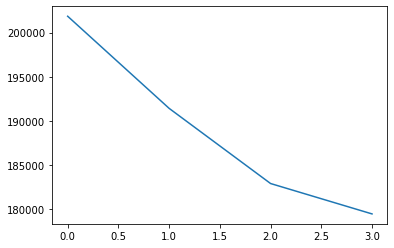

In [38]:
elbow_method(dataset)

In [39]:
def elbow_method(dataframe):
    distanceMeasures=[]
    for k in range(4,9):
        vec=K_scratch(dataframe,k,10)
        distance=vec[-1]
        #print(vec)
        distanceMeasures.append(distance)
    plt.plot(distanceMeasures)
    plt.show()

k== 4
k== 5
k== 6
k== 7
k== 8


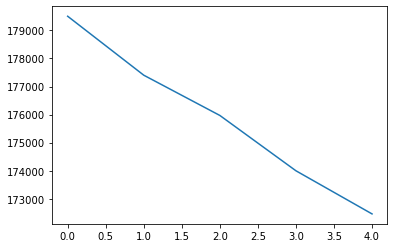

In [40]:
elbow_method(dataset)

k== 2
k== 3
k== 4
k== 5
k== 6
k== 7
k== 8
k== 9
k== 10
k== 11
k== 12
k== 13
k== 14
k== 15


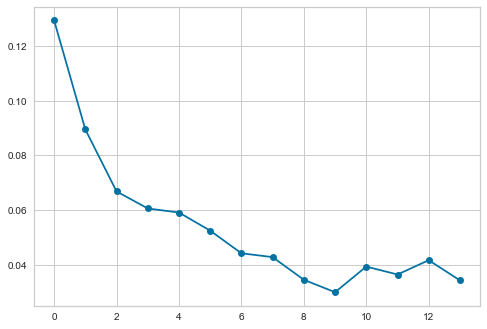

In [48]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    K_scratch(dataset,k,10)
    labels = np.asarray(dataset["cluster_#"])
    sil.append(silhouette_score(X=dataset.iloc[:,:-5],labels=labels, metric='euclidean'))
plt.plot(sil,"b-o")

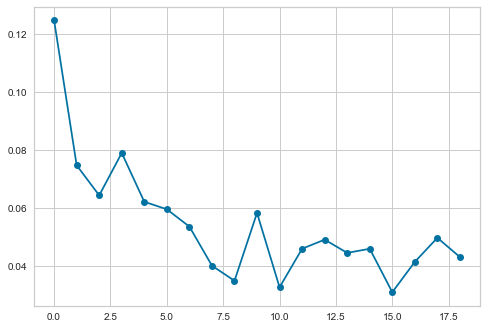

In [47]:
plt.plot(sil,"b-o")

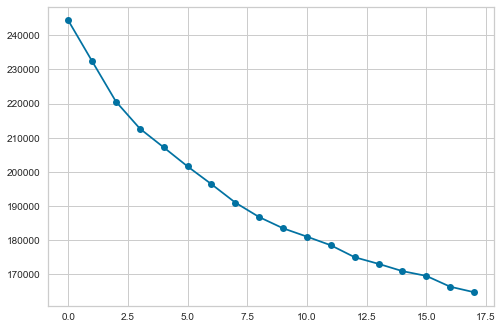

In [31]:
!pip3 install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

score=[]
dispertion=[]
for i in range(2,20):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit_predict(dataset2.iloc[:,:-5])
    score.append(silhouette_score(dataset2.iloc[:,:-5], km.labels_, metric='euclidean'))
    dispertion.append(km.inertia_)
#plt.plot(score,'b-o')
plt.plot(dispertion,'b-o')